# Ejercicio 2 - Retroalimentación Retrasada y Oscilaciones
Michelle Mejia y Silvia Illescas

## Teoría

**1. ¿Cómo los retrasos en la percepción causan oscilaciones?**

Los retrasos en la percepción impiden que las decisiones se basen en el estado real del sistema. En su lugar, las decisiones se toman con base en información desactualizada, lo que puede provocar sobrecorrecciones y oscilaciones. Por ejemplo, en la analogía del termostato, si el sistema tarda mucho en detectar el cambio de temperatura, puede sobrecalentar o sobreenfriar antes de corregirse.

**2. ¿Por qué bucles de equilibrio + retrasos → sobreimpulso/insuficiencia?**

En los sistemas de retroalimentación con bucles de equilibrio, el objetivo es minimizar la diferencia entre la situación actual y la deseada. Si hay un retraso en la percepción, las acciones correctivas se basan en datos obsoletos. Esto puede causar que la respuesta sea excesiva o insuficiente, generando oscilaciones alrededor del punto de equilibrio.

**3. Ejemplos reales (ciclos económicos, respuestas a pandemias):**

- *Ciclos económicos:* Políticas monetarias o fiscales implementadas tarde pueden estimular o enfriar la economía en momentos no adecuados, amplificando los ciclos.
- *Pandemias:* Las respuestas tardías al aumento de casos (como confinamientos o campañas de vacunación) pueden permitir que el contagio se descontrole antes de que se estabilice, generando múltiples olas.

**4. Para una acción con un objetivo de 100 y un retraso en la percepción de 20 días:**

a. **Magnitud del sobreimpulso si el retraso del ajuste es de 10 días:**

El sobreimpulso dependerá de la ganancia del sistema. Un ajuste con retardo menor que la percepción generaría sobreimpulso más pronunciado. No se podría dar un valor exacto sin simular, pero se esperaría una oscilación moderada.

b. **¿Cómo podría una recopilación más rápida de datos reducir las oscilaciones?**

Reducir el retraso en la percepción permite tomar decisiones más informadas y ajustadas a la realidad. Esto mejora la estabilidad del sistema y evita respuestas erráticas o desfasadas que provoquen oscilaciones.

C:\Users\usuario\AppData\Local\Temp\ipykernel_20112\4078310045.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  erlang_kernel = ((t_vals**(n_etapas-1)) * np.exp(-t_vals/tau)) / ((tau**n_etapas) * np.math.factorial(n_etapas-1))


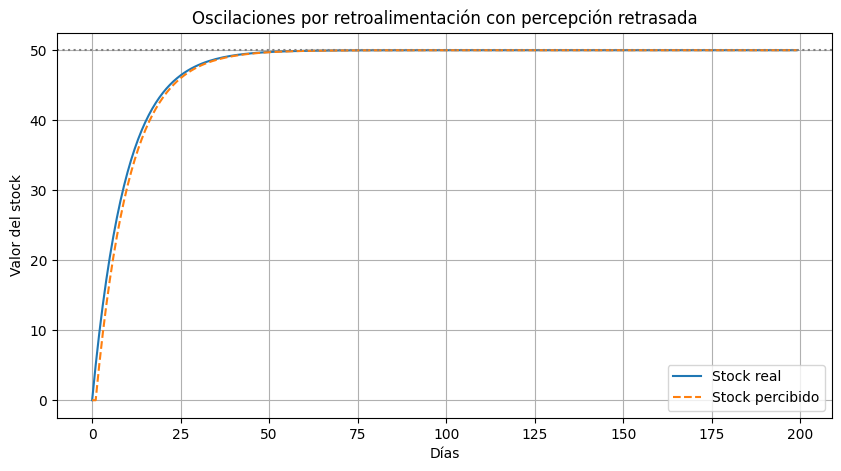

In [1]:
# Práctica - Simulación del sistema con retroalimentación retrasada
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
objetivo = 50
retraso_ajuste = 10
dias = 200
dt = 1
stock_real = [0]
stock_percibido = [0]

# Kernel para Erlang de 15 días (2 etapas)
n_etapas = 2
tau = 15
t_vals = np.arange(0, 6*tau)
erlang_kernel = ((t_vals**(n_etapas-1)) * np.exp(-t_vals/tau)) / ((tau**n_etapas) * np.math.factorial(n_etapas-1))
erlang_kernel /= erlang_kernel.sum()  # normalizar

# Simulación
for t in range(1, dias):
    # Actualizar percepción usando convolución
    buffer_real = np.array(stock_real + [stock_real[-1]] * (len(erlang_kernel)-1))
    percibido = np.convolve(buffer_real, erlang_kernel, mode='valid')[t-1]
    stock_percibido.append(percibido)

    # Flujo de ajuste basado en percepción
    flujo = (objetivo - percibido) / retraso_ajuste
    nuevo_stock = stock_real[-1] + flujo * dt
    stock_real.append(nuevo_stock)

# Gráficas
plt.figure(figsize=(10,5))
plt.plot(stock_real, label='Stock real')
plt.plot(stock_percibido, label='Stock percibido', linestyle='--')
plt.axhline(y=objetivo, color='gray', linestyle=':')
plt.title('Oscilaciones por retroalimentación con percepción retrasada')
plt.xlabel('Días')
plt.ylabel('Valor del stock')
plt.legend()
plt.grid(True)
plt.show()

Último prompt utilizado:

“¿Este es el resultado esperado para la gráfica de oscilación? ¿Y qué puedes interpretar?”

Explicación de por qué este prompt funcionó:

Este prompt me permitió confirmar que el comportamiento observado en la simulación del Ejercicio 2 era correcto, interpretando el gráfico generado por el modelo con retroalimentación retrasada. ChatGPT explicó que, aunque en la teoría los sistemas con percepción retrasada pueden generar oscilaciones, estas no necesariamente se presentan si el sistema es estable, con parámetros como retardo suave, sin ruido y sin una ganancia excesiva. También me sugirió cómo modificar los parámetros para forzar oscilaciones, lo cual fue útil para comprender mejor la dinámica del modelo.

Análisis de la solución presentada:

La gráfica obtenida muestra que el sistema de retroalimentación se dirige de forma suave y estable hacia el 50, tanto para el stock real como el percibido. Esto indica que los parámetros del modelo (retardo tipo Erlang, tiempo de ajuste y valor del objetivo) están configurados de forma que el sistema es sobreamortiguado, sin sobreimpulsos ni oscilaciones.